#  AirBnB IronHack - Predict AirBnB price in Amsterdam

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as plt
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
sns.set(rc={"figure.figsize": (12.,6.)})
from src.cleaning4 import *

In [2]:
data=pd.read_csv('../Data/test.csv')
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/43916178,20211205213126,2021-12-06,bright room to unplug and disconnect,this bright and quiet bedroom will offer you t...,Amsterdam Oost is becoming every day a more co...,https://a0.muscache.com/pictures/96d9838d-1200...,9574877,https://www.airbnb.com/users/show/9574877,Filippo,2013-10-22,"Amsterdam, North Holland, Netherlands",I'm a young Italian designer with the passion ...,within an hour,100%,50%,f,https://a0.muscache.com/im/pictures/user/64492...,https://a0.muscache.com/im/pictures/user/64492...,NaN,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,NaN,52.35713,4.92470,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,29,59,89,89,2021-12-06,2,2,2,2021-11-16,2021-11-07,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0363 06C1 183D 5969 41C2,f,1,0,1,0,2.0
1,1,https://www.airbnb.com/rooms/45539504,20211205213126,2021-12-06,STAY CLOSE IN OUR SEMI-PRIVATE BUNK POD FOR 2,"BUNK Hotel Amsterdam is situated in the hip, u...",Just minutes by free ferry from Central Statio...,https://a0.muscache.com/pictures/44c4cc8e-2dc5...,243878598,https://www.airbnb.com/users/show/243878598,Bunk,2019-02-18,Netherlands,BUNK bridges the gap between hotels and hostel...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/f29b2...,https://a0.muscache.com/im/pictures/user/f29b2...,NaN,0,0,"['email', 'phone']",t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Noord,NaN,52.38810,4.91438,Shared room in hostel,Shared room,2,NaN,1 shared bath,1.0,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365,1.0,3.0,999.0,999.0,1.0,999.0,NaN,t,0,0,5,280,2021-12-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt,t,12,0,10,2,NaN


*Firstly we drop those columns that, without any analysis, we know we wont wont use them to predict the price*

In [3]:
data=data.drop(columns=['listing_url','scrape_id','last_scraped','name','picture_url','host_url','host_name',
                        'host_thumbnail_url',
                        'host_picture_url','license','host_about','description','host_location','host_neighbourhood',
                       'neighbourhood_group_cleansed','bathrooms','calendar_updated','calendar_last_scraped',
                       'host_verifications','host_id','host_since','host_response_time','host_response_rate',
                       'host_acceptance_rate','first_review','last_review'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1389 non-null   int64  
 1   neighborhood_overview                         967 non-null    object 
 2   host_is_superhost                             1389 non-null   object 
 3   host_listings_count                           1389 non-null   int64  
 4   host_total_listings_count                     1389 non-null   int64  
 5   host_has_profile_pic                          1389 non-null   object 
 6   host_identity_verified                        1389 non-null   object 
 7   neighbourhood                                 967 non-null    object 
 8   neighbourhood_cleansed                        1389 non-null   object 
 9   latitude                                      1389 non-null   f

In [5]:
data.shape

(1389, 47)

*We need to check the proportion of nan values*

In [6]:
pd.options.display.min_rows = 74
nan=((data.isnull().sum())/len(data))*100
nan.sort_values(ascending = False)[:25]

neighborhood_overview                           30.381569
neighbourhood                                   30.381569
review_scores_cleanliness                        9.935205
review_scores_accuracy                           9.863211
review_scores_location                           9.863211
review_scores_checkin                            9.863211
review_scores_communication                      9.863211
review_scores_value                              9.863211
review_scores_rating                             9.719222
reviews_per_month                                9.719222
beds                                             5.543557
bedrooms                                         5.183585
bathrooms_text                                   0.431965
instant_bookable                                 0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
has_availability                                 0.000000
calculated_hos

*We drop more columns due they contains the same information than others with less nan values.*

In [7]:
data=data.drop(columns=['neighbourhood','neighborhood_overview'])

In [8]:
data.shape

(1389, 45)

*Now, before droping more columns we analyzed the correlation between them in different groups. We change to numeric those we need to compare.*

In [9]:
data[['host_total_listings_count', 'maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
    'review_scores_communication','review_scores_value']] = data[['host_total_listings_count', 
    'maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
    'review_scores_communication','review_scores_value']].apply(pd.to_numeric,errors='coerce',axis=1)

#### Host_listings_count

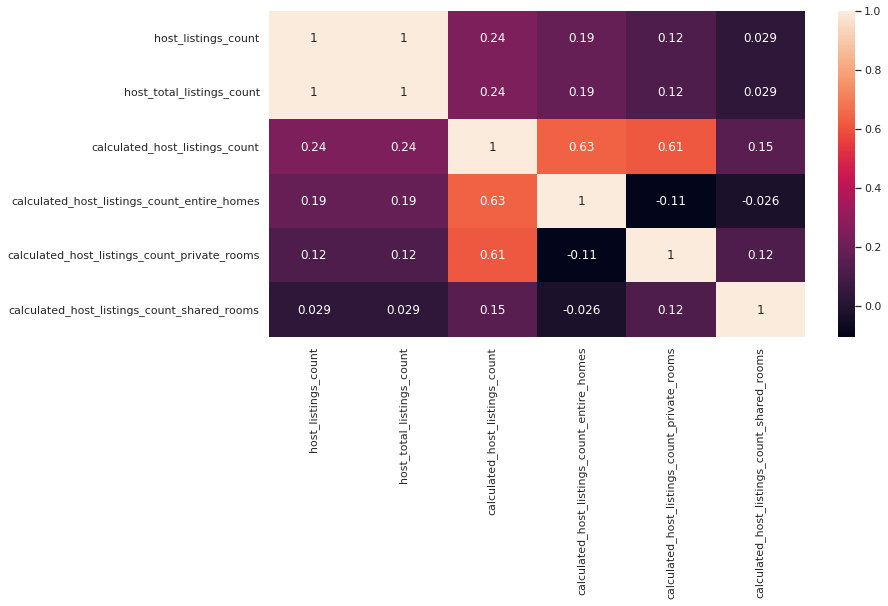

In [10]:
corrMatrix=data[['host_listings_count','host_total_listings_count', 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms']].corr()
sns.heatmap(corrMatrix, annot=True);

In [11]:
compare= data[["host_total_listings_count", "calculated_host_listings_count",'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']]
compare.sample(5)

,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1178,2.0,1,0,1,0
925,1.0,1,1,0,0
928,1.0,1,1,0,0
20,4.0,4,4,0,0
268,1.0,1,1,0,0


In [12]:
difference=print(sum((data.host_listings_count == data.calculated_host_listings_count) == False))
difference

482


*After analysing this corrMatrix, we drop all the columns except 'calculated_host_listings_count' due its the sum of the other three calculated columns (regarding host_listings) and also because it reflects the same information as host_total_listings_count in about 65% of the rows. 
The only difference is that it is data obtained from scraping, while the other source is Airbnb.*

In [13]:
data1=data.drop(columns=['host_total_listings_count','calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                         'host_listings_count'])

#### Minimum & Maximum nights

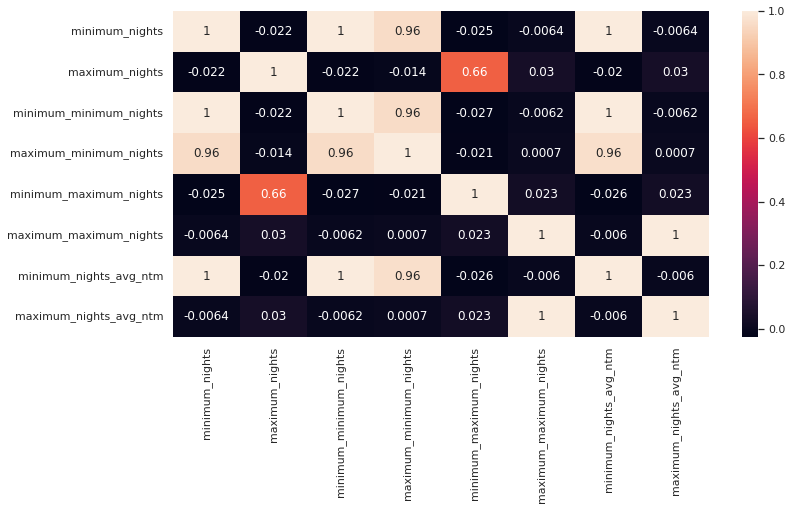

In [14]:
corrMatrix=data1[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm']].corr();
sns.heatmap(corrMatrix, annot=True);

In [15]:
sum((data1.minimum_nights == data1.minimum_minimum_nights) == False)

99

*After analysing this corrMatrix, we drop all the columns except 'minimum_nights' & 'maximum_nights' due to their correlation with the others*.

In [16]:
data2=data1.drop(columns=['minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm'])

#### Availability

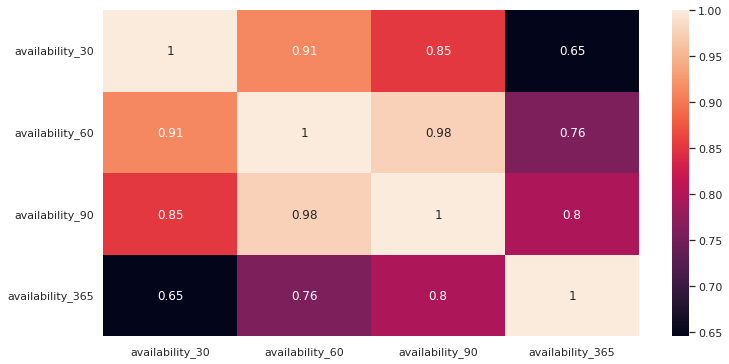

In [17]:
corrMatrix = data2[['availability_30', 'availability_60', 'availability_90','availability_365']].corr()
sns.heatmap(corrMatrix, annot=True);

In [18]:
sum((data2.availability_90 == data2.availability_60) == False)

658

*After analysing this corrMatrix, we drop all the columns except 'availability_90' due its the one with the highest correlation with the others*.

In [19]:
data3=data2.drop(columns=['availability_30', 'availability_60','availability_365'])

#### Reviews

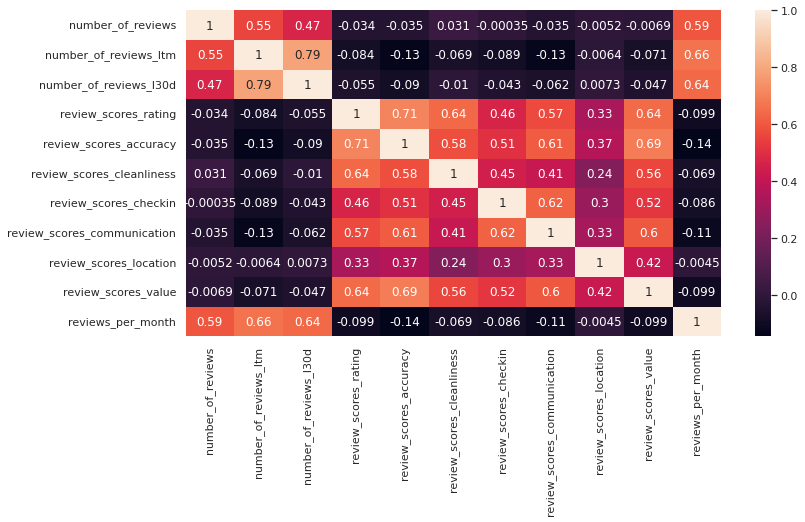

In [20]:
corrMatrix=data3[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating',
                 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].corr();
sns.heatmap(corrMatrix, annot=True);

*We below columns, due high correlation with the others*

In [21]:
datas=data3.drop(columns=['number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_accuracy'])

In [22]:
datas.shape

(1389, 28)

*We check again nan values and total correlation*

In [23]:
pd.options.display.min_rows = 82
nan1=(datas.isnull().sum()/len(datas))*100
nan1.sort_values(ascending = False)[:10]

review_scores_cleanliness      9.935205
review_scores_value            9.863211
review_scores_location         9.863211
review_scores_communication    9.863211
review_scores_checkin          9.863211
reviews_per_month              9.719222
review_scores_rating           9.719222
beds                           5.543557
bedrooms                       5.183585
bathrooms_text                 0.431965
dtype: float64

In [24]:
corr_total=datas.corr().T
corr_total.sum()

id                                0.945219
latitude                          0.861538
longitude                         1.429786
accommodates                      2.345445
bedrooms                          1.950308
beds                              2.445565
minimum_nights                    1.144144
maximum_nights                    0.941181
availability_90                   0.755600
number_of_reviews                 1.499374
review_scores_rating              2.967643
review_scores_cleanliness         2.773463
review_scores_checkin             2.843299
review_scores_communication       2.933110
review_scores_location            2.147917
review_scores_value               3.030151
calculated_host_listings_count    0.075557
reviews_per_month                 1.281011
dtype: float64

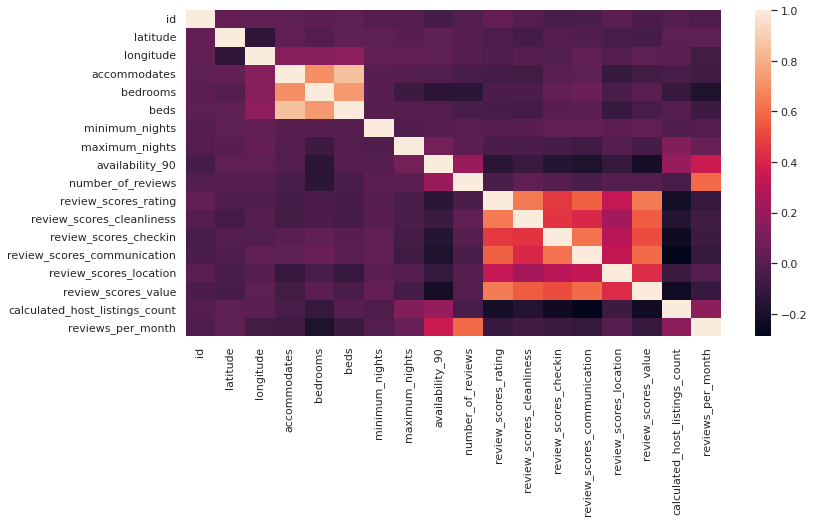

In [25]:
corrMatrix = datas.corr()
sns.heatmap(corrMatrix)
sns.set(rc={"figure.figsize": (15.,10.)})
sns.set_context("poster")
sns.set_style("whitegrid")
plt.show();

*Regarding latitude and longitude we drop them and create a different dataframe to use later. We also drop beds due correlation with accomodates*

In [26]:
location=datas[['id','latitude','longitude']]

In [27]:
dt=datas.drop(columns=['latitude','longitude','beds'])

In [28]:
dt.isnull().sum()

id                                  0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      6
bedrooms                           72
amenities                           0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_90                     0
number_of_reviews                   0
review_scores_rating              135
review_scores_cleanliness         138
review_scores_checkin             137
review_scores_communication       137
review_scores_location            137
review_scores_value               137
instant_bookable                    0
calculated_host_listings_count      0
reviews_per_month                 135
dtype: int64

*Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including*

In [29]:
dt.replace({'f': 0, 't': 1}, inplace=True)

*We also need to change to numeric several columns to plot the histograms.*

In [30]:
dt[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']] = dt[['host_is_superhost',
    'host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']].apply(pd.to_numeric,errors='coerce',axis=1)

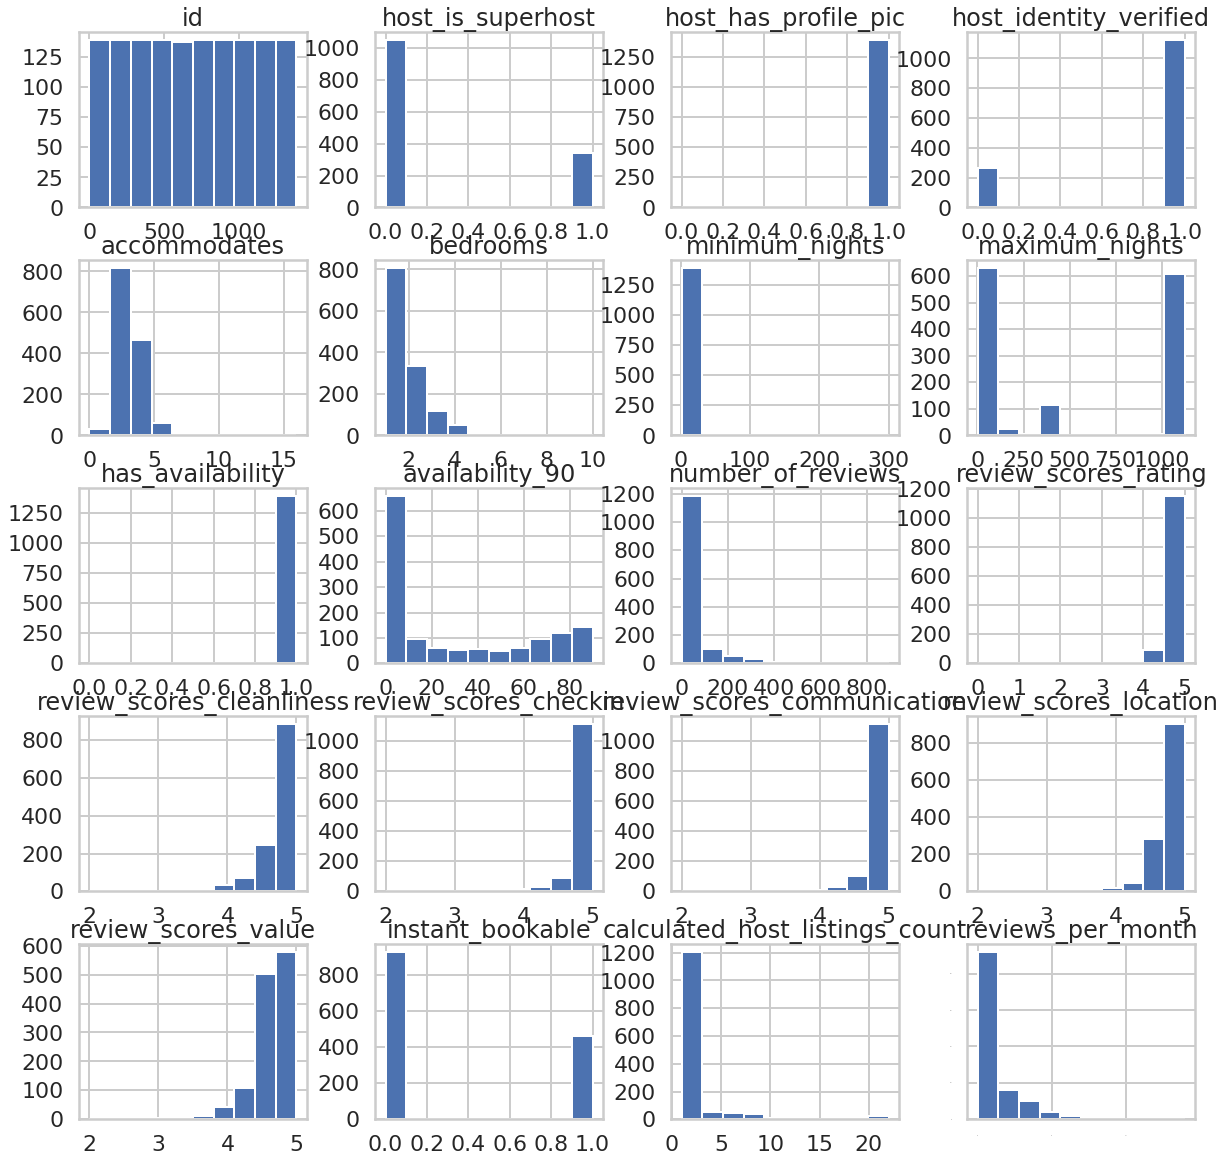

In [31]:
dt.hist(figsize=(20,20));
sns.set(rc={"figure.figsize": (20.,20.)})
plt.xticks(size = 0)
plt.yticks(size = 0);

*We can conculde that several columns only contain one category so they can be dropped.*

In [32]:
dt=dt.drop(columns=['has_availability','host_has_profile_pic'])

In [33]:
dt.shape

(1389, 23)

*We check again the sum of nan values to replace them where its convenient*

In [34]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)[:8]

review_scores_cleanliness      138
review_scores_value            137
review_scores_location         137
review_scores_communication    137
review_scores_checkin          137
reviews_per_month              135
review_scores_rating           135
bedrooms                        72
dtype: int64

*We fill with'0' the rows with nan in the reviews columns.*

In [35]:
dt[['review_scores_rating']]=dt[['review_scores_rating']].fillna(value=0)
dt[['review_scores_value']]=dt[['review_scores_value']].fillna(value=0)
dt[['review_scores_location']]=dt[['review_scores_location']].fillna(value=0)
dt[['review_scores_checkin']]=dt[['review_scores_checkin']].fillna(value=0)
dt[['review_scores_cleanliness']]=dt[['review_scores_cleanliness']].fillna(value=0)
dt[['reviews_per_month']]=dt[['reviews_per_month']].fillna(value=0)
dt[['review_scores_communication']]=dt[['review_scores_communication']].fillna(value=0)

*We will replace the nan in the bedrooms columns with the median.*

In [36]:
dt[['bedrooms']]=dt[['bedrooms']].fillna(value=round(dt.bedrooms.mean()))

In [37]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)

bathrooms_text                    6
id                                0
availability_90                   0
calculated_host_listings_count    0
instant_bookable                  0
review_scores_value               0
review_scores_location            0
review_scores_communication       0
review_scores_checkin             0
review_scores_cleanliness         0
review_scores_rating              0
number_of_reviews                 0
maximum_nights                    0
host_is_superhost                 0
minimum_nights                    0
amenities                         0
bedrooms                          0
accommodates                      0
room_type                         0
property_type                     0
neighbourhood_cleansed            0
host_identity_verified            0
reviews_per_month                 0
dtype: int64

*We clean property type and bathrooms_text columns*

In [38]:
dt['property_type']=dt['property_type'].apply(room)

In [39]:
dt['bathrooms_text']=dt['bathrooms_text'].apply(limpieza2)
dt.head(2)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,0,0.0,1.0,Oud-Oost,house,Private room,1,1,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125.0,89,2.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,1,2.0
1,1,0.0,1.0,Oud-Noord,hostel,Shared room,2,1,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,0.0


In [40]:
dt.shape

(1389, 23)

*We convert several columns from float to integer*

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1389 non-null   int64  
 1   host_is_superhost               1389 non-null   float64
 2   host_identity_verified          1389 non-null   float64
 3   neighbourhood_cleansed          1389 non-null   object 
 4   property_type                   1389 non-null   object 
 5   room_type                       1389 non-null   object 
 6   accommodates                    1389 non-null   int64  
 7   bathrooms_text                  1389 non-null   object 
 8   bedrooms                        1389 non-null   float64
 9   amenities                       1389 non-null   object 
 10  minimum_nights                  1389 non-null   int64  
 11  maximum_nights                  1389 non-null   float64
 12  availability_90                 13

In [42]:
dt= dt.astype({'host_is_superhost':'int','host_identity_verified':'int','bedrooms':'int',
              'maximum_nights':'int','number_of_reviews':'int','instant_bookable':'int'}) 

*For now, we will also drop the amenities column*

In [43]:
dt=dt.drop(columns='amenities')

In [44]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1389 non-null   int64  
 1   host_is_superhost               1389 non-null   int64  
 2   host_identity_verified          1389 non-null   int64  
 3   neighbourhood_cleansed          1389 non-null   object 
 4   property_type                   1389 non-null   object 
 5   room_type                       1389 non-null   object 
 6   accommodates                    1389 non-null   int64  
 7   bathrooms_text                  1389 non-null   object 
 8   bedrooms                        1389 non-null   int64  
 9   minimum_nights                  1389 non-null   int64  
 10  maximum_nights                  1389 non-null   int64  
 11  availability_90                 1389 non-null   int64  
 12  number_of_reviews               13

##### OUTLIERS

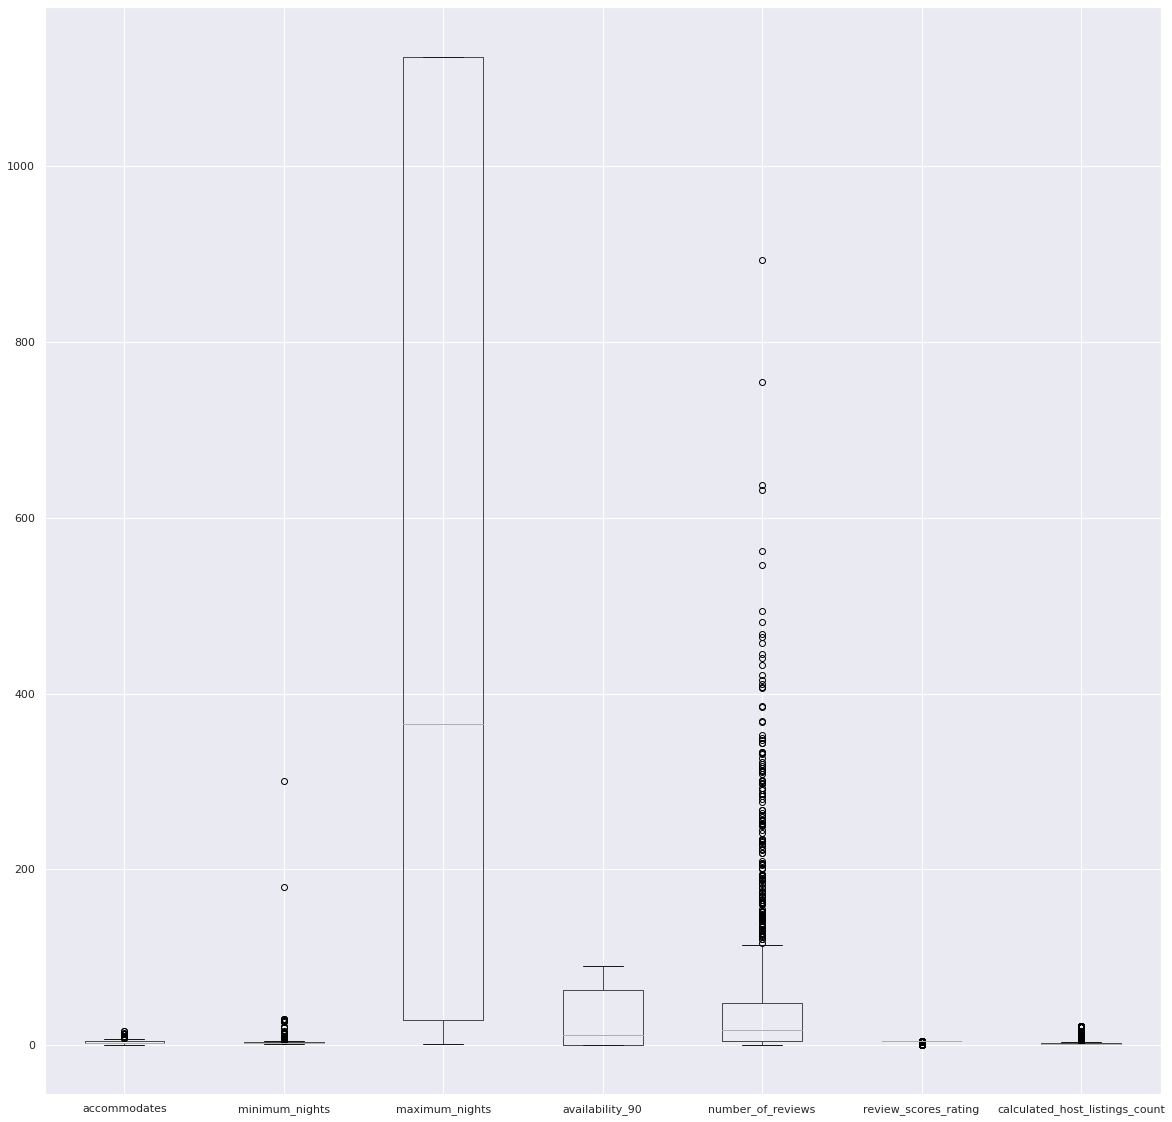

In [45]:
boxplot = dt.boxplot(column=['accommodates','minimum_nights','maximum_nights','availability_90','number_of_reviews','review_scores_rating',
                                 'calculated_host_listings_count'])

In [46]:
dt.number_of_reviews.median()

17.0

In [47]:
dt.number_of_reviews.mean()

49.02735781137509

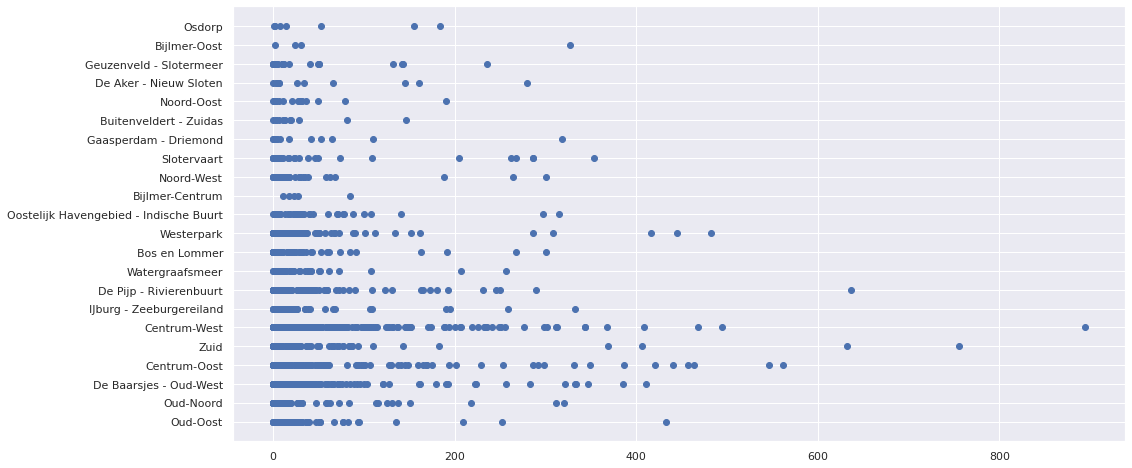

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dt['number_of_reviews'],dt['neighbourhood_cleansed'])
#plt.xlim([400, 800])
plt.show()

We will 'remove' number_of_reviews outliers. If number > 400 we will replace it for 400€

In [49]:
def rev(x):
    if x>=400:
        return 400
    else:
        return x

In [50]:
dt['number_of_reviews']=dt['number_of_reviews'].apply(rev)

In [51]:
dt.shape

(1389, 22)

*Finally,we convert the object columns with 'get dummies'*

In [52]:
final=pd.get_dummies(data=dt,columns=['neighbourhood_cleansed','property_type','room_type','bathrooms_text'], drop_first=True)
final.head(1)

,id,host_is_superhost,host_identity_verified,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,neighbourhood_cleansed_Centrum-West,neighbourhood_cleansed_De Aker - Nieuw Sloten,neighbourhood_cleansed_De Baarsjes - Oud-West,neighbourhood_cleansed_De Pijp - Rivierenbuurt,neighbourhood_cleansed_Gaasperdam - Driemond,neighbourhood_cleansed_Geuzenveld - Slotermeer,neighbourhood_cleansed_IJburg - Zeeburgereiland,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,property_type_apartment,property_type_bed and breakfast,property_type_boat,property_type_condominium,property_type_hostel,property_type_hotel,property_type_house,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0,bathrooms_text_1,bathrooms_text_1.5,bathrooms_text_2,bathrooms_text_2.5,bathrooms_text_3,bathrooms_text_3.5,bathrooms_text_4
0,0,0,1,1,1,2,1125,89,2,5.0,5.0,5.0,5.0,5.0,5.0,0,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [53]:
final['bathrooms_text_4.5']=0
final['bathrooms_text_5']=0
final['bathrooms_text_5.5']=0

In [54]:
final.shape

(1389, 60)

In [55]:
final.to_csv('Test4.csv', index=False)

## MODELING

#### Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR #recomendado paper
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import RandomForestRegressor as RFR

### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts

In [ ]:
dfnum = dt.select_dtypes(include=np.number)

In [ ]:
dfnum=dfnum.drop(columns=['price'])

In [ ]:
dfnum.shape

In [ ]:
data=StandardScaler().fit_transform(dfnum)
data=pd.DataFrame(data)
data.head()

In [ ]:
pca=PCA()
pca.fit(data)

In [ ]:
pca.explained_variance_ratio_[:10]

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('% variance')
plt.ylim([0, 1.01]);

In this case, to get 100% of variance explained I need 10 principal components.

The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean.
Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.

Por ejemplo, un nivel de confianza de 95% indica que si usted toma 100 muestras aleatorias de la población, podría esperar que aproximadamente 95 de las muestras produzcan intervalos que contengan la desviación estándar o la varianza de la población.
Un borde superior define un valor en comparación con el cual es probable que la desviación estándar o la varianza de la población sea menor. Un borde inferior define un valor en comparación con el cual es probable que la desviación estándar o la varianza de la población sea mayor.

### Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
features=list(final.columns)
features.remove('price')

In [ ]:
features=features
target='price'

In [ ]:
X_train, X_test, y_train, y_test = tts(final[features], final[target])

In [ ]:
modelo=RFR() #CTR

In [ ]:
# recursive feature elimination
selector=RFE(modelo, n_features_to_select=10, step=1)

In [ ]:
# entrenar a traves del RFE
selector.fit(X_train, y_train)

In [ ]:
selector.ranking_  # escala de 1 a n, 1 es lo mas importante con respecto de la y

In [ ]:
[features[i] for i,e in enumerate(selector.support_) if e] # las mas importantes

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = tts(final[[features[i] for i,e in enumerate(selector.support_) if e]], 
                                       final[target])

In [ ]:
rfr=RFR(n_estimators=50) #CTR

In [ ]:
rfr.fit(X_train_s, y_train_s)
y_pred=rfr.predict(X_test_s)

In [ ]:
train_score=rfr.score(X_train_s, y_train_s)  #CTR si (0.92/0,31)
test_score=rfr.score(X_test_s, y_test_s)
mean_sq=mean_squared_error(y_test_s, y_pred, squared=False)

print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)

In [ ]:
from sklearn.feature_selection import SelectFromModel as SFM

In [ ]:
modelo=CTR(verbose=0)

selector=SFM(modelo, threshold=0.25) #MODELO CAMBIADO POR RANDOM FOREST
selector.fit(X_train, y_train)
modelo.fit(X_train, y_train)


In [ ]:
modelo.feature_importances_[:10]

In [ ]:
sum(modelo.feature_importances_)

In [ ]:
list(zip(features, modelo.feature_importances_))

In [ ]:
X=final.drop('price', axis=1)
y=final.price

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [ ]:
def regre(modelo):
    
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)
   
    return modelo

In [ ]:
sgdr=SGDR(max_iter=200)
sgdr=regre(sgdr)

max_iter, el valor predeterminado es 200. El número máximo de iteraciones. El solucionador itera hasta la convergencia (determinada por 'tol') o este número de iteraciones. Para un solucionador aleatorio ('sgd', 'adam'), tenga en cuenta que esto determina el número de períodos (el número de usos por punto de datos), no el número de pasos de gradiente.

In [ ]:
knnr=KNNR(n_neighbors=5, weights='distance')
knnr=regre(knnr)

In [ ]:
gbr=GBR(n_estimators=50, learning_rate=0.2)
gbr=regre(gbr)

In [ ]:
xgbr=XGBR()
xgbr=regre(xgbr)

In [ ]:
ctr=CTR(verbose=0) #training progress for each epoch./PENDIENTE SUBIR MAÑANA (CON 0.9)
ctr=regre(ctr)

In [ ]:
lgbmr=LGBMR()
lgbmr=regre(lgbmr)

In [ ]:
rfr=RFR(n_estimators=200)
rfr=regre(rfr)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, train_size=0.99, random_state=42)

In [ ]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('rsme:', mean_sq)
    print('\n')
    

In [ ]:
modelos=[LinReg(), Lasso(), ElasticNet(), SVR(),Ridge(),SGDR(max_iter=500),KNNR(n_neighbors=5, weights='distance'),
        GBR(n_estimators=50, learning_rate=0.2),XGBR(),CTR(verbose=0),RFR(n_estimators=100),LGBMR()]

for m in modelos:
    prueba_modelo(m)

In [ ]:
def bosque(n):
    rfr=RFR(n_estimators=n,max_depth=100)
    rfr.fit(X_train, y_train)

    y_pred=rfr.predict(X_test)
    

    train_score=rfr.score(X_train, y_train)  
    test_score=rfr.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)


    print('Train:', train_score)
    print('Test:', test_score)
    print('rsme:', mean_sq)

In [ ]:
for e in [2, 5, 50, 100, 200]:
    print(e, bosque(e))

## RESULTS

In [ ]:
X=final.drop('price', axis=1)
y=final.price

In [ ]:
Test2=pd.read_csv('../Data/Test2.csv')

In [ ]:
Prices=pd.read_csv('../Data/sample.csv')

### 1- 85.45348

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [ ]:
modelo=ctr
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')

In [ ]:
modelo= ctr
modelo.fit(X,y)
y_pred1_2=modelo.predict(Test2) 

In [ ]:
#Prices['price']=y_pred1_2

In [ ]:
#Prices.to_csv('sample22_1.csv', index=False)

In [ ]:
pd.read_csv('sample22.csv').head(20)

### A- 